# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set? Answer: Another optional parameter is tunning the n_stimators for RF and GBR however I decided to use the default.
3. Implement each machine learning model with `X` and `y`

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

info = {'index': ['DT','RF','GB'], 'model': [], 'MSE Training accuracy': [], 'MSE Validation accuracy': [], 
        'R2 Training accuracy' : [], 'R2 Validation accuracy': []}

# Another optional parameter is tunning the n_stimators for RF and GBR however I decided to use the default.
info['model'].append(DecisionTreeRegressor(max_depth = 5, random_state = 0))     # tree model
info['model'].append(RandomForestRegressor(max_depth = 5, random_state = 0))     # forest model
info['model'].append(GradientBoostingRegressor(max_depth = 5, random_state = 0)) # gbr model

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for model in info['model']:
    tree_scores = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    info['MSE Training accuracy'].append(-1 * tree_scores['train_score'].mean()) 
    info['MSE Validation accuracy'].append(-1 * tree_scores['test_score'].mean())  

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [5]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
pd.set_option('display.precision', 3)

results = pd.DataFrame({
    'MSE Training accuracy': info['MSE Training accuracy'],
    'MSE Validation accuracy': info['MSE Validation accuracy']
}, index=info['index'])
results

,MSE Training accuracy,MSE Validation accuracy
DT,47.280,73.447
RF,29.576,45.052
GB,3.379,22.820


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [6]:
# TO DO: ADD YOUR CODE HERE
for model in info['model']:
    tree_scores = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    info['R2 Training accuracy'].append(tree_scores['train_score'].mean()) 
    info['R2 Validation accuracy'].append(tree_scores['test_score'].mean())  
    

results['R2 Training accuracy'] = info['R2 Training accuracy']
results['R2 Validation accuracy'] = info['R2 Validation accuracy']
results[['R2 Training accuracy', 'R2 Validation accuracy']]

,R2 Training accuracy,R2 Validation accuracy
DT,0.834,0.739
RF,0.897,0.841
GB,0.988,0.919


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.


Results using LinearRegression in the previous assigment:

|               | Training accuracy | Validation accuracy |
|---------------|-------------------|---------------------|
| MSE           | 111.358439        | 95.904136           |
| R2 score      | 0.610823          | 0.623414            |

Answers:
1. When compared to linear regression's MSE values 111.35 and 95.90 for training and validation accuracy. DT reduced the values to 47 and 73, RF further lower it to 29 and finally GB had the best MSE with 3 and 22 respectively. This means that overall the distance or error between the predicted values and the actual values was reduced the more complex model we use. Once again this is demonstrated when comparing R2 values, the R2 training and validation accuracy increased from .61 and .62 in linear regression to up to .988 and .919 using gradient booster. However notice that overall the R2 training accuracy for DT, RF and GB is high when compared to their validation accuracy thus we might benefit from some parameter tunning as we might have be slightly overfitting. But this is just my guess based on the numbers.

1. For this dataset I would choose gradient booster regression because it offered the lowest MSE validation accuracy and the highest R2 validation accuracy. However in other scenario I might have chosen random forests because they require less careful parameter tunning.

1. Something that I mentioned in a comment above is that in the case of RF and GB I would test (tune) different numbers of stimators. For decision tres I could tune max_depth, max_leaf_nodes or min_samples_leaf.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

I completed each step in ascending order (following the same order in which each question or code implementation problem appears). Although for this exercise I had to go back and make changes a few times after I realised I made mistakes. 

I sourced my code mainly copyng, pasting and then editing the code from the example notebooks in d2l. 

Yes I use chatgpt when I get frustraded of certain part of my code not working. Although I use chatgpt as a last resort and try to solve any issues on my own first. For this excercise I was getting amazing MSE scores when compared to linear regression and terrible R2 scores. So for me this didn't make any sense since lower MSE leads to higher R2 and because I coudn't find the reason why this happened I asked chatgpt. Chatgpt agreed with me that it din't make sense and pointing the reasons as: "Error in Calculation or Reporting, Scale of Data, Variability in the Baseline Model or Overfitting". Fairly enough I double checked my code and I was using cross validate with X and y instead of X_train and y_train.

I didn't have any bigger challenges besides the one I just mentioned. I think Decision trees, Random forests and Gradient boosting models are faily easy to understand. 

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [7]:
# TO DO: Import wine dataset
!pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# wine.data.targets returns a df with a single column thus I extract it a a data series 
X, y = wine.data.features, wine.data.targets['class']
print(f"X shape: {X.shape}\ny shape: {y.shape}") 

X shape: (178, 13)
y shape: (178,)


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [9]:
# TO DO: ADD YOUR CODE HERE
X.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [10]:
# TO DO: ADD YOUR CODE HERE
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [11]:
y.isnull().sum()

0

How many samples do we have of each type of wine?

In [12]:
# TO DO: ADD YOUR CODE HERE
print('\n'.join([f"Type {i} has {c} samples" for i, c in enumerate(y.value_counts().sort_index())]))

Type 0 has 59 samples
Type 1 has 71 samples
Type 2 has 48 samples


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

info = {'index': ['SVC','DTC'], 'Training accuracy': [], 'Validation accuracy': []}

info['model'] = [SVC(random_state = 0), DecisionTreeClassifier(max_depth = 3, random_state = 0)]

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for model in info['model']:
    model_scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    info['Training accuracy'].append(model_scores['train_score'].mean())
    info['Validation accuracy'].append(model_scores['test_score'].mean())

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [23]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
results = pd.DataFrame({'Data size': [X_train.shape, X_train.shape],
                        'Training accuracy': info['Training accuracy'],
                        'Validation accuracy': info['Validation accuracy']
}, index = info['index'])
results

,Data size,Training accuracy,Validation accuracy
SVC,"(133, 13)",0.680,0.677
DTC,"(133, 13)",0.994,0.894


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [16]:
# TO DO: Implement best model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

DTC_trained = info['model'][1].fit(X_train, y_train)
y_pred = DTC_trained.predict(X_val)

Text(170.97222222222223, 0.5, 'true value')

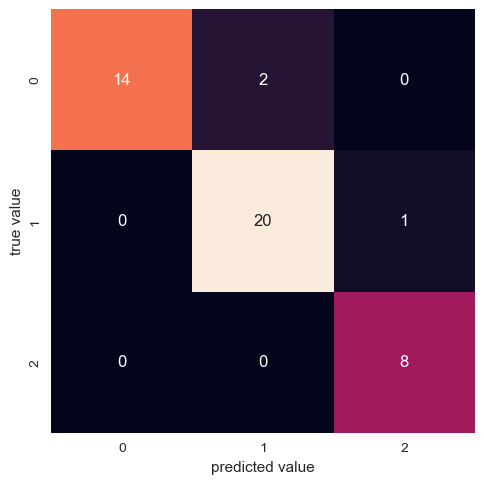

In [17]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_val, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [18]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

report_dict = classification_report(y_val, y_pred, target_names=["type 1", "type 2", "type 3"], output_dict=True)
pd.DataFrame(report_dict).transpose()

,precision,recall,f1-score,support
type 1,1.000,0.875,0.933,16.000
type 2,0.909,0.952,0.930,21.000
type 3,0.889,1.000,0.941,8.000
accuracy,0.933,0.933,0.933,0.933
macro avg,0.933,0.942,0.935,45.000
weighted avg,0.938,0.933,0.933,45.000


### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [19]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*